In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Loading Dataset
df = pd.read_csv("StudentsPerformance.csv")  # change path if needed
print(df.shape)


(1000, 8)


In [4]:
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [6]:
display(df.describe(include='all'))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [7]:
display(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
# Loop through each column
for col in df.columns:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False))


=== gender ===
gender
female    518
male      482
Name: count, dtype: int64

=== race/ethnicity ===
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

=== parental level of education ===
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

=== lunch ===
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

=== test preparation course ===
test preparation course
none         642
completed    358
Name: count, dtype: int64

=== math score ===
math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64

=== reading score ===
reading score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: count, Length: 72, dty

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

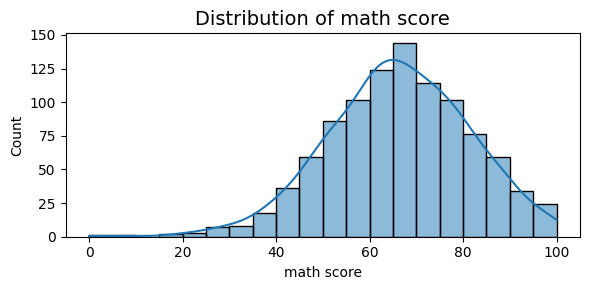

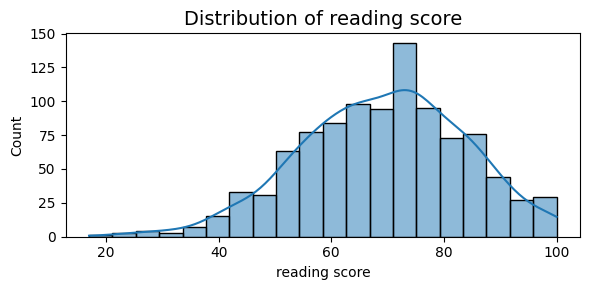

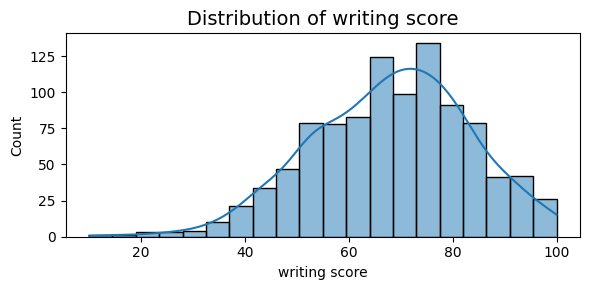

In [34]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 3))  # individual figure size
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

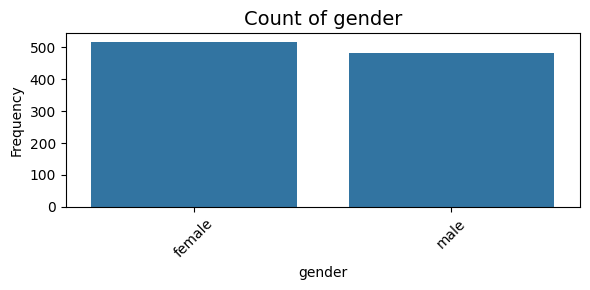

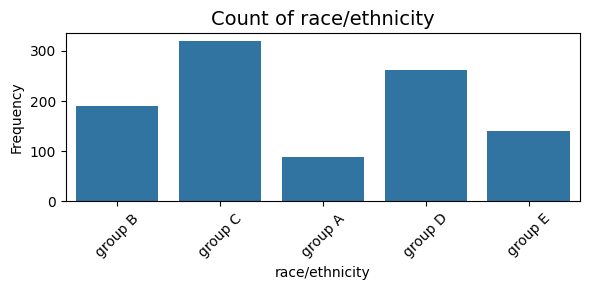

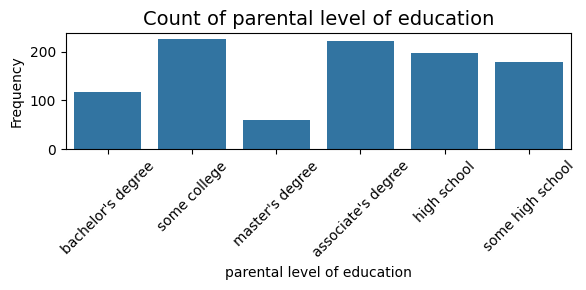

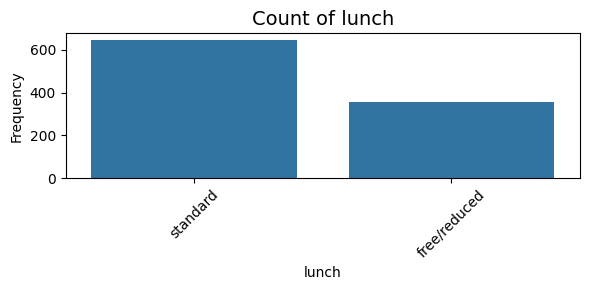

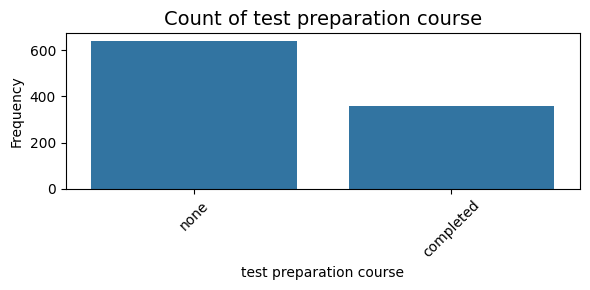

In [35]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Axes: >

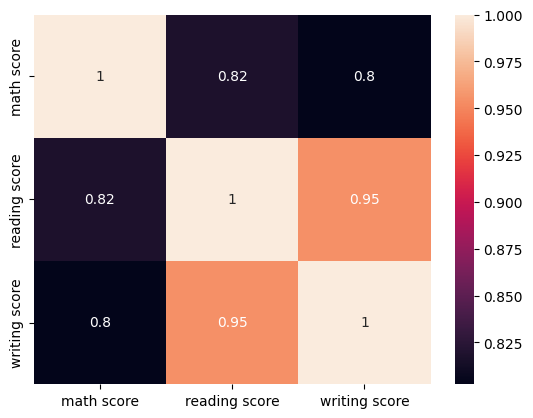

In [37]:
## Corrleation
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)